In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [313]:
# Load dataset
df_train = pd.read_csv("train.csv")
df_train.drop_duplicates(inplace=True)
df_train['lot_size'].loc[df_train['lot_size_units'] == 'acre'] = df_train['lot_size'].loc[df_train['lot_size_units'] == 'acre'] * 43560
df_train.drop(["lot_size_units", "size_units"], axis=1, inplace=True)
df_train.fillna(df_train.mean(), inplace=True)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [314]:
df_train.nunique()

beds         11
baths        16
size        879
lot_size    960
zip_code     28
price       767
dtype: int64

In [315]:
df_test = pd.read_csv("test.csv")
df_test.drop(["lot_size_units", "size_units"], axis=1, inplace=True)

In [316]:
X_train, y_train = df_train.drop("price", axis=1), df_train.price
X_test, y_test = df_test.drop("price", axis=1), df_test.price

In [317]:
X_train

,beds,baths,size,lot_size,zip_code
0,3,2.5,2590.0,6000.00000,98144
1,4,2.0,2240.0,13503.60000,98106
2,4,3.0,2040.0,3783.00000,98107
3,4,3.0,3800.0,5175.00000,98199
4,2,2.0,1042.0,18869.29241,98102
...,...,...,...,...,...
2011,3,2.0,1370.0,21780.00000,98112
2012,1,1.0,889.0,18869.29241,98121
2013,4,2.0,2140.0,6250.00000,98199
2014,2,2.0,795.0,18869.29241,98103


In [318]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 1.42857143e-01,  2.94117647e-01,  2.41635688e-01,
         3.39776849e-04,  1.83673469e-01],
       [ 2.14285714e-01,  5.29411765e-01,  2.59293680e-01,
         4.13425777e-04,  5.10204082e-02],
       [ 1.42857143e-01,  5.88235294e-02,  9.66542751e-02,
         5.09481611e-04,  2.44897959e-01],
       ...,
       [ 1.42857143e-01,  2.35294118e-01,  2.50929368e-01,
        -4.58726296e-05,  1.73469388e-01],
       [ 2.85714286e-01,  5.29411765e-01,  2.56505576e-01,
         4.02865145e-04,  1.42857143e-01],
       [ 1.42857143e-01,  1.76470588e-01,  9.76765799e-02,
         2.29578952e-04,  2.04081633e-02]])

In [319]:
X_train.shape

(2007, 5)

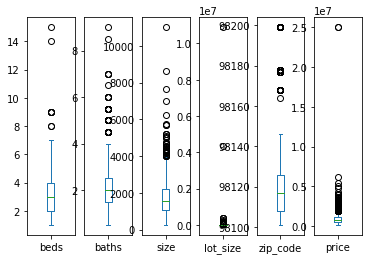

In [320]:
df_train.plot(kind='box', subplots=True, sharex=False, sharey=False);

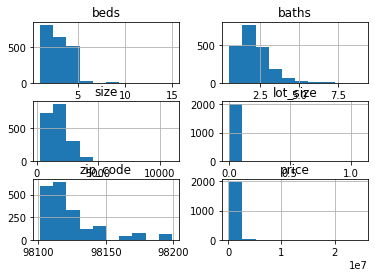

In [321]:
df_train.hist();

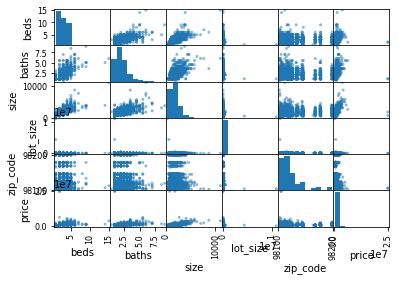

In [322]:
pd.plotting.scatter_matrix(df_train);

In [323]:
y_train

0        795000.0
1        915000.0
2        950000.0
3       1950000.0
4        950000.0
          ...    
2011     910000.0
2012     550000.0
2013    1150000.0
2014     590000.0
2015     659000.0
Name: price, Length: 2007, dtype: float64

In [324]:
# sns.pairplot(df_train, hue="price")

In [330]:
np.logspace(-2, 2, 5)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [328]:
# Set up the parameter grids for each model
LR = {'fit_intercept': [True, False]}
RI = {'alpha':np.logspace(-2, 2, 5), 'solver': ['cholesky', 'svd']}
LAS = {'alpha': [0.1, 1.0, 10.0], 'fit_intercept': [True, False]}
ES = {'alpha': [0.1, 1.0, 10.0], 'fit_intercept': [True, False]}

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression(), LR))
models.append(('RI', Ridge(), RI))
models.append(('LAS', Lasso(), LAS))
models.append(('ES', ElasticNet(), ES))


# evaluate each model in turn
results = []
names = []
for name, model, params in models:
    grid_result = GridSearchCV(model, params, cv=5, scoring='r2', return_train_score=True)
    grid_result.fit(X_train, y_train)
    print(name, grid_result.best_score_, grid_result.best_params_)
    


LR 0.3966836966868409 {'fit_intercept': True}
RI 0.39668358511257623 {'alpha': 0.01, 'solver': 'cholesky'}
LAS 0.3966836590313599 {'alpha': 0.1, 'fit_intercept': True}
ES 0.39578048144788036 {'alpha': 0.1, 'fit_intercept': True}


In [329]:
for name, model, params in models:
    grid_result = RandomizedSearchCV(model, params, cv=5, n_iter=100, scoring='r2')
    grid_result.fit(X_train, y_train)
    print(name, grid_result.best_score_, grid_result.best_params_)

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=100. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LR 0.3966836966868409 {'fit_intercept': True}


/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RI 0.39668358511257623 {'solver': 'cholesky', 'alpha': 0.01}


/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LAS 0.3966836590313599 {'fit_intercept': True, 'alpha': 0.1}


/root/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ES 0.39578048144788036 {'fit_intercept': True, 'alpha': 0.1}
